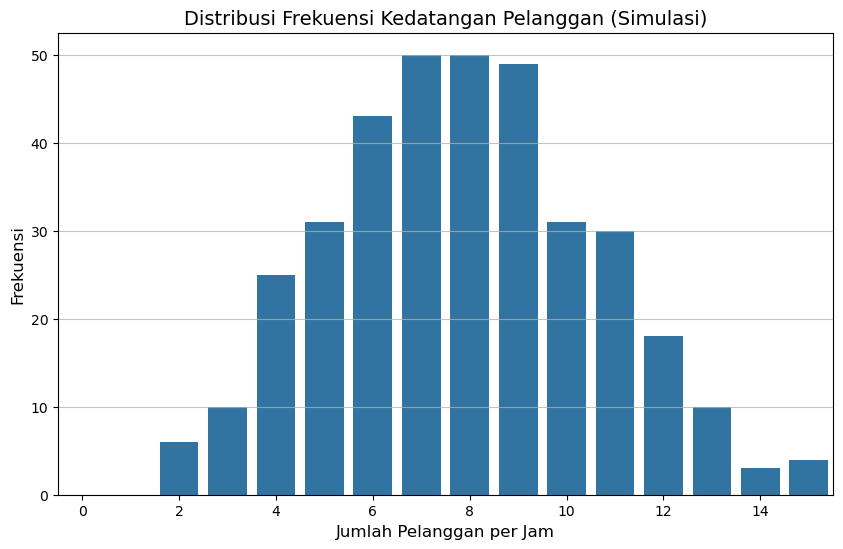


Probabilitas tidak ada pelanggan dalam satu jam: 0.0003
Probabilitas lebih dari 10 pelanggan dalam satu jam: 0.1841


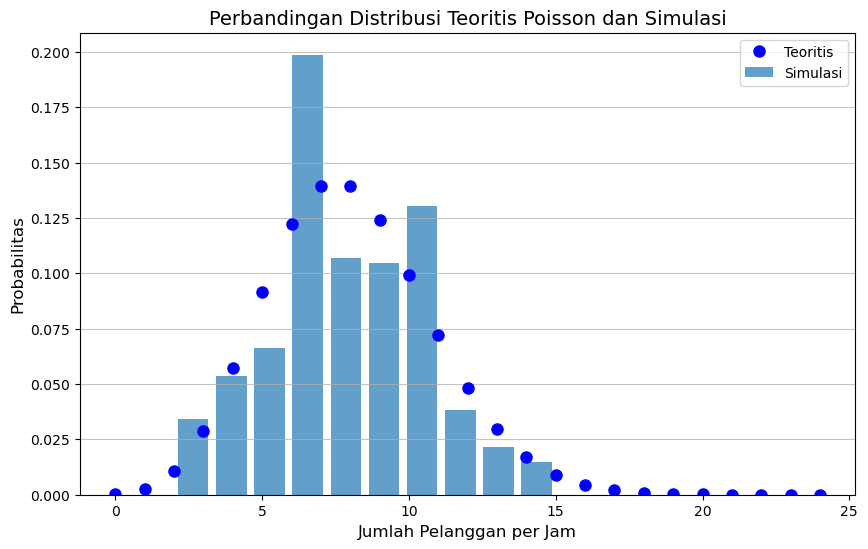

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
import seaborn as sns

# Parameter
rata_rata_kedatangan = 8  # Rata-rata pelanggan per jam
jam_operasional = 12      # Jam operasional gerai
hari_simulasi = 30       # Jumlah hari simulasi

# Simulasi Data Kedatangan
np.random.seed(42)  # Untuk reproducibility
simulasi_kedatangan = np.random.poisson(rata_rata_kedatangan, size=(hari_simulasi, jam_operasional))

# Hitung Distribusi Frekuensi
frekuensi_kedatangan = np.histogram(simulasi_kedatangan.flatten(), bins=range(simulasi_kedatangan.max() + 2))[0]

# Visualisasi Distribusi Frekuensi
plt.figure(figsize=(10, 6))
sns.barplot(x=np.arange(simulasi_kedatangan.max() + 1), y=frekuensi_kedatangan)
plt.title("Distribusi Frekuensi Kedatangan Pelanggan (Simulasi)", fontsize=14)
plt.xlabel("Jumlah Pelanggan per Jam", fontsize=12)
plt.ylabel("Frekuensi", fontsize=12)
plt.xticks(range(0, simulasi_kedatangan.max() + 1, 2))  # Langkah 2 untuk x-ticks
plt.grid(axis='y', alpha=0.75)
plt.show()

# Hitung Probabilitas
# a. Tidak ada pelanggan dalam satu jam
prob_tidak_ada = poisson.pmf(0, rata_rata_kedatangan)
print(f"\nProbabilitas tidak ada pelanggan dalam satu jam: {prob_tidak_ada:.4f}")

# b. Lebih dari 10 pelanggan dalam satu jam
prob_lebih_dari_10 = 1 - poisson.cdf(10, rata_rata_kedatangan)
print(f"Probabilitas lebih dari 10 pelanggan dalam satu jam: {prob_lebih_dari_10:.4f}")

# c. Bandingkan dengan Distribusi Teoritis Poisson
# Distribusi Teoritis
x = np.arange(0, 25)  # Rentang nilai untuk distribusi Poisson
pmf_teoritis = poisson.pmf(x, rata_rata_kedatangan)

# Visualisasi Perbandingan
plt.figure(figsize=(10, 6))
plt.plot(x, pmf_teoritis, 'bo', ms=8, label='Teoritis')
plt.hist(simulasi_kedatangan.flatten(), density=True, alpha=0.7, rwidth=0.8, label='Simulasi')
plt.title("Perbandingan Distribusi Teoritis Poisson dan Simulasi", fontsize=14)
plt.xlabel("Jumlah Pelanggan per Jam", fontsize=12)
plt.ylabel("Probabilitas", fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()